In [1]:
import pandas as pd
import numpy as np
from analysis_utils import *


In [2]:
PAREDAO = "paredao10"
CAND1_PATH = "data/paredao10/manu.csv"
CAND2_PATH = "data/paredao10/mari.csv"
CAND3_PATH = "data/paredao10/prior.csv"
DATE = 3
IGNORE_HASHTAGS = ["#bbb20", "#redebbb", "#bbb2020"]


In [3]:
candidate1_df = pd.read_csv(CAND1_PATH)
candidate2_df = pd.read_csv(CAND2_PATH)
candidate3_df = pd.read_csv(CAND3_PATH)

In [4]:
cand1 = candidate1_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand2 = candidate2_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]
cand3 = candidate3_df[["tweet", "sentiment", "date", "likes_count", "retweets_count", "hashtags"]]

# Manu

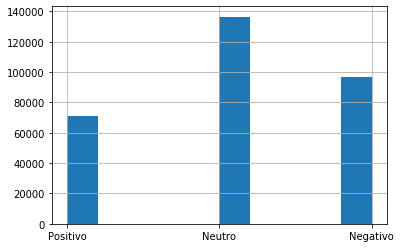

In [5]:
cand1["sentiment"].hist()

# Mari

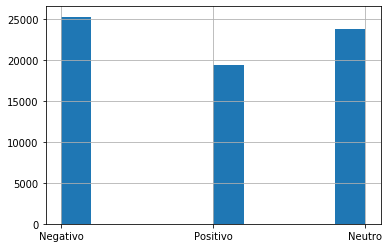

In [7]:
cand2["sentiment"].hist()

# Prior (Eliminado)

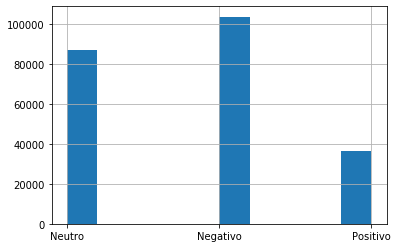

In [9]:
cand3["sentiment"].hist()

# Quantidades absolutas

In [11]:
candidates = {"manu_gavassi": cand1, "mari": cand2, "felipe_prior": cand3}

In [12]:
qtds_df = get_raw_quantities(candidates)

In [13]:
qtds_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,71199,136446,96911
mari,19342,23829,25292
felipe_prior,36649,87341,103775


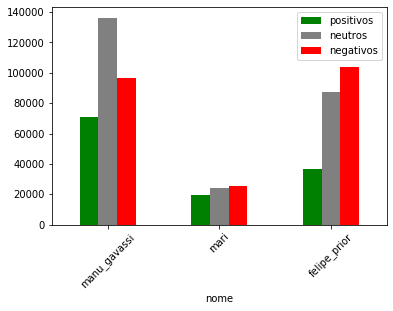

In [14]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação aos total de tweets de cada candidato

In [15]:
pcts_df = get_pct_by_candidate(candidates)

In [16]:
pcts_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,0.233780,0.448016,0.318204
mari,0.282518,0.348057,0.369426
felipe_prior,0.160907,0.383470,0.455623


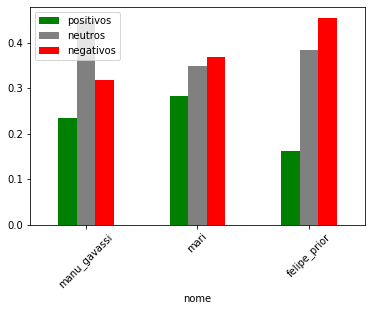

In [17]:
pcts_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Porcentagens em relação ao total de tweets por categoria

In [18]:
qtds_df_copy = qtds_df.copy()

In [19]:
qtds_df["positivos"] /= qtds_df["positivos"].sum() 
qtds_df["neutros"] /= qtds_df["neutros"].sum()
qtds_df["negativos"] /= qtds_df["negativos"].sum()

In [20]:
qtds_df

,positivos,neutros,negativos
nome,,,
manu_gavassi,0.559785,0.551039,0.428851
mari,0.152072,0.096234,0.111922
felipe_prior,0.288144,0.352728,0.459226


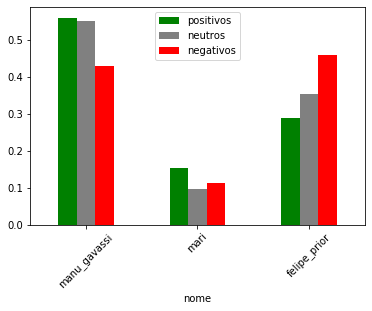

In [21]:
qtds_df.plot.bar(rot=45, color=['green', 'gray', 'red'])

# Tweets por dia

In [22]:
names = list(candidates.keys())
tweets_by_day_df = get_tweets_by_day(candidates[names[0]], names[0])
for name in names[1:]:
    current = get_tweets_by_day(candidates[name], name)
    tweets_by_day_df = tweets_by_day_df.append(current)

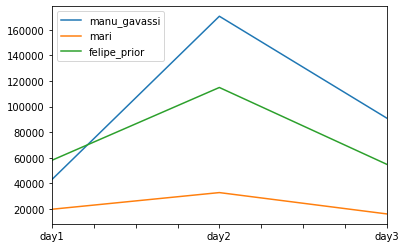

In [23]:
tweets_by_day_df.transpose().plot()

# Análise de hashtags

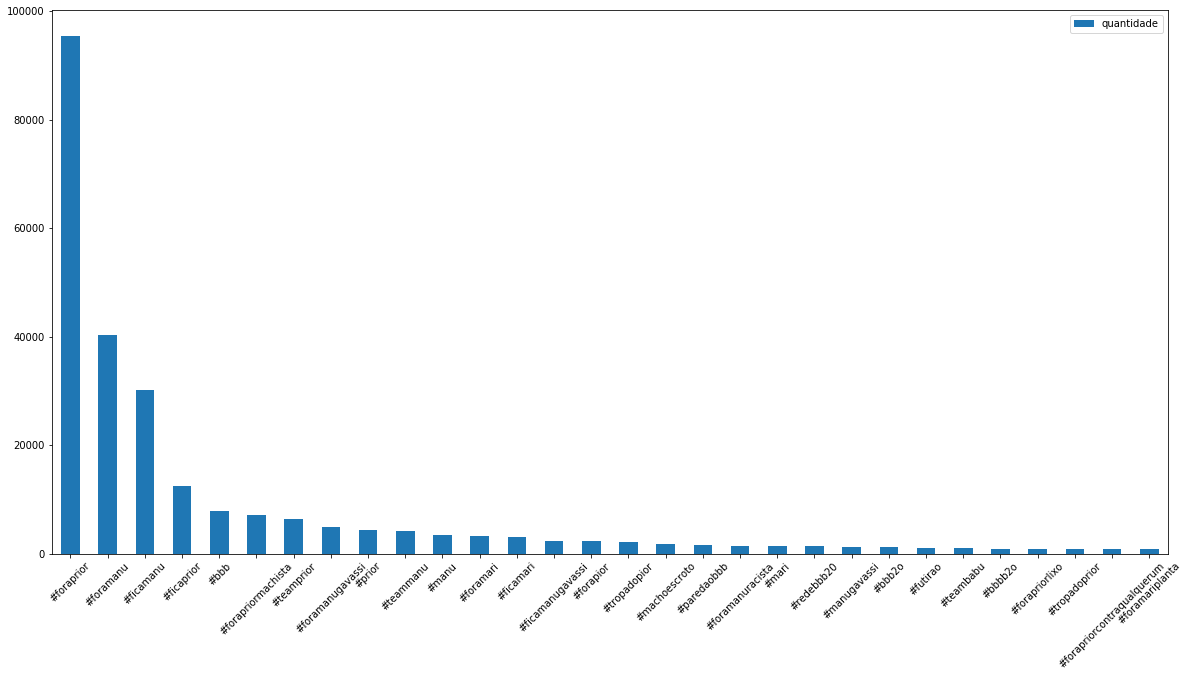

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

unique_df = get_unique_hashtags(list(candidates.values()))
unique_df.drop(index=IGNORE_HASHTAGS, inplace=True)
unique_df.sort_values(by="quantidade", ascending=False).head(30).plot.bar(rot=45)

In [37]:
alias = {"manu_gavassi": "manu", "mari": "mari", "felipe_prior": "prior"}
fica_fora_df = get_fica_fora_quantities(unique_df, alias)


In [38]:
fica_fora_df

,fica,fora
manu_gavassi,30069,40235
mari,2982,3304
felipe_prior,12535,95402


# Seleção de atributos

In [39]:
atributes_df = qtds_df_copy.join(pcts_df, rsuffix="_individual_pct")
atributes_df = atributes_df.join(qtds_df, rsuffix="_global_pct")
atributes_df = atributes_df.join(tweets_by_day_df)
atributes_df = atributes_df.join(fica_fora_df)

In [40]:
raw_participantes_info = get_participantes_info()[DATE]
print("Seguidores atualizados em:", raw_participantes_info["date"])

Seguidores atualizados em: 10-04-2020


In [41]:
participantes_info = raw_participantes_info["infos"]
paredoes_info = get_paredoes_info()

In [42]:
followers = [participantes_info[participante]["seguidores"] for participante in atributes_df.index]


In [43]:
likes = [get_likes_count(candidates[participante]) for participante in atributes_df.index]

In [44]:
retweets = [get_retweets_count(candidates[participante]) for participante in atributes_df.index]

In [45]:
paredao_info = paredoes_info[PAREDAO]["candidatos"]
results_info = {candidate["nome"]: candidate["porcentagem"]/100 for candidate in paredao_info}
rejection = [results_info[participante] for participante in atributes_df.index]

In [46]:
atributes_df["likes"] = likes
atributes_df["retweets"] = retweets
atributes_df["seguidores"] = followers
atributes_df["rejeicao"] = rejection

In [47]:
atributes_df

,positivos,neutros,negativos,positivos_individual_pct,neutros_individual_pct,negativos_individual_pct,positivos_global_pct,neutros_global_pct,negativos_global_pct,day1,day2,day3,fica,fora,likes,retweets,seguidores,rejeicao
nome,,,,,,,,,,,,,,,,,,
manu_gavassi,71199,136446,96911,0.233780,0.448016,0.318204,0.559785,0.551039,0.428851,42943,170635,90978,30069,40235,6621309,989025,4785334,0.4251
mari,19342,23829,25292,0.282518,0.348057,0.369426,0.152072,0.096234,0.111922,19694,32725,16044,2982,3304,967975,131232,269733,0.0076
felipe_prior,36649,87341,103775,0.160907,0.383470,0.455623,0.288144,0.352728,0.459226,57998,114917,54850,12535,95402,6664432,1291988,642881,0.5673


In [48]:
atributes_df.to_csv("data/{}/paredao_atributes.csv".format(PAREDAO))